# WE RATE DOGS PROJECT

## Gather 

### Needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import json
import os.path
from os import path
import tweepy
import re
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_colwidth', -1)

### Download `image_prediction`

In [2]:
if not path.exists("image-predictions.tsv"):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

    response = requests.get(url)
    with open(url.split("/")[-1],mode="wb") as file:
        file.write(response.content)

### Download from twitter

In [3]:
if not path.exists("tweet_json.txt"):
    consumer_key = 'MY_API_KEY'
    consumer_secret = 'MY_API_SECRET'
    access_token = 'MY_ACCESS_TOKEN'
    access_secret = 'MY_ACCESS_SECRET'

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    tweet_errors = {}

    for tweet_id in twee_df.tweet_id:
        try:
            tweet = api.get_status(tweet_id,tweet_mode='extended')
            print(tweet_id)
            with open("tweet_json.txt","a") as file:
                file.write(json.dumps(tweet._json))
                file.write("\r\n")
        except Exception as e:
            print(str(tweet_id) + ": " + str(e))
            tweet_errors[str(tweet_id)] = str(e)

### Load tweet_json.txt 

In [4]:
twee_data = []

with open('tweet_json.txt') as file:
    for line in file:
        twee_dict = json.loads(line)
        tweet_id = twee_dict['id']
        retweet_count = twee_dict['retweet_count']
        favorite_count = twee_dict['favorite_count']
        full_text = twee_dict['full_text']
        twee_data.append({'tweet_id':int(tweet_id),
                          'retweet_count' : int(retweet_count),
                          'favorite_count': int(favorite_count),
                          'text':full_text,
                          'favorited':twee_dict['favorited'],
                          'retweeted':twee_dict['retweeted']})
 
twee_data = pd.DataFrame(twee_data)

### Load `twitter-archive-enhanced.csv`

In [5]:
twee_arx = pd.read_csv('twitter-archive-enhanced.csv')

### Load `image_prediction.tsv`

In [6]:
image_pred = pd.read_csv("image-predictions.tsv",sep="\t")

## Assess

In [7]:
twee_data

,favorite_count,favorited,retweet_count,retweeted,text,tweet_id
0,36288,False,7723,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,892420643555336193
1,31289,False,5714,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",892177421306343426
2,23558,False,3786,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,891815181378084864
3,39579,False,7882,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,891689557279858688
4,37802,False,8500,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",891327558926688256
5,19041,False,2849,False,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,891087950875897856
6,11088,False,1854,False,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,890971913173991426
7,61145,False,17238,False,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,890729181411237888
8,26197,False,3922,False,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,890609185150312448
9,29935,False,6714,False,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,890240255349198849


In [8]:
twee_arx

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [9]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
twee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 6 columns):
favorite_count    2330 non-null int64
favorited         2330 non-null bool
retweet_count     2330 non-null int64
retweeted         2330 non-null bool
text              2330 non-null object
tweet_id          2330 non-null int64
dtypes: bool(2), int64(3), object(1)
memory usage: 77.4+ KB


In [11]:
twee_arx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
twee_arx.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twee_arx[twee_arx.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
twee_arx.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1589,686683045143953408,NaN,NaN,2016-01-11 22:56:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper https://t.co/pgD6h0yhgz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686683045143953408/photo/1,11,10,Mona,None,None,pupper,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None
147,863432100342583297,NaN,NaN,2017-05-13 16:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Belle. She's never been more pupset. Encountered the worst imaginable type of zone. 12/10 would do anything to cheer pup https://t.co/fGQUzR8w3H,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863432100342583297/photo/1,12,10,Belle,None,None,None,None
1229,713761197720473600,NaN,NaN,2016-03-26 16:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Piper. She would really like that tennis ball core. Super sneaky tongue slip. 12/10 precious af https://t.co/QP6GHi5az9,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/713761197720473600/photo/1,https://twitter.com/dog_rates/status/713761197720473600/photo/1",12,10,Piper,None,None,None,None
891,759557299618865152,NaN,NaN,2016-07-31 01:12:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emma. She can't believe her last guess didn't hit. Convinced ur stacking them on top of each other. 10/10 https://t.co/JRV1dhBYwu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759557299618865152/photo/1,https://twitter.com/dog_rates/status/759557299618865152/photo/1,https://twitter.com/dog_rates/status/759557299618865152/photo/1",10,10,Emma,None,None,None,None


In [16]:
twee_arx.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
twee_arx.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [18]:
twee_arx.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [19]:
twee_arx.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
twee_arx.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [21]:
twee_arx.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [22]:
twee_arx.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [23]:
twee_arx.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [24]:
twee_arx.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [25]:
((twee_arx.doggo=='None') & (twee_arx.floofer=='None') & (twee_arx.pupper=='None') & (twee_arx.puppo=='None')).value_counts()

True     1976
False    380 
dtype: int64

In [26]:
(twee_arx.puppo=='puppo').sum()+(twee_arx.pupper=='pupper').sum()+(twee_arx.doggo=='doggo').sum()+(twee_arx.floofer=='floofer').sum()

394

#### Quality
##### *`twee_data`* table
- Missing records (2330 instead of 2356)

##### *`twee_arx`* table
- Missing data in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`
- `timestamp` should be in Datetime datatype not string
- `retweeted_status_timestamp` should be in Datetime datatype not string

- Errors in `rating_numerator` and `rating_denominator` 

- Errors in `name`: such, a, not, one, my, his, this, unacceptable, .... They are all in lower case.
- stage `doggo` contains values None and doggo. They should be `0` for not doggo and `1` for being a doggo.
- Missing a lot of data in stage variable (doggo, floofer, pupper, puppo) <span style="color:blue">(can't clean)</span>

- Unnecessary columns `source`, `timestamp`, `expanded_urls`

##### *`image_pred`* table
- Missing records (2075 instead of 2356)
- Dog's breeds are lower case and sometime upper case.

#### Tidiness

- One varible in four columns in `twee_arx` table (`doggo`,`floofer`,`pupper`,`puppo`)
- Columns `retweet_count` and `favorite_count` should also be part of the `twee_arx` table
- column `text` in `twee_arx` duplicated in `twee_data` table
- `text` column in `twee_data` table should be split into `name`, `rating_numerator` and `rating_denominator`
- `twee_data` and `twee_arx` contain retweet record. These record should be remove because they are not part of our analysis.

## Clean

In [27]:
twee_arx_clean = twee_arx.copy()
twee_data_clean = twee_data.copy()
image_pred_clean = image_pred.copy()

### Missing data

#### Missing records

- `twee_data`: Missing records (2330 instead of 2356). These happen due to the deleted status of the tweets so it can't be cleaned. We will cut off the deleted tweets from other tables.
- `image_pred`: Missing records (2075 instead of 2356). This issue can't be cleaned since we don't have the prediction model. So the same solution as the missing data in `twee_data` table. We will created the intersection of all tables.

#### Define:
Find the tweets that are all three tables and cut off the other tweets from the tables.

#### Code:

In [28]:
list_tweets = list(set(twee_data.tweet_id) & set(twee_arx.tweet_id) & set(image_pred.tweet_id))

In [29]:
twee_arx_clean.set_index('tweet_id',inplace=True)
twee_data_clean.set_index('tweet_id',inplace=True)
image_pred_clean.set_index('tweet_id',inplace=True)
twee_arx_clean = twee_arx_clean.loc[list_tweets]
twee_data_clean = twee_data_clean.loc[list_tweets]
image_pred_clean = image_pred_clean.loc[list_tweets]

#### Test

In [30]:
set(twee_data_clean.index) == set(twee_arx_clean.index) == set(image_pred_clean.index)

True

#### Missing data in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` in `twee_arx` table

- Actually, these are not the missing data issues. These are poorly represented values. Those `NaN` mean the tweet is not a reply in another tweet. Since we are only interested in whether a tweet is an original tweet or a reply, we should use 0 for a reply and 1 for an orignal tweet.

#### Define:

In `twee_arx` table:
-  Create a new column name original_tweet which has value: 

    - `True` if the corresponding value in both columns `in_reply_to_status_id` and `retweeted_status_id` is `NaN`
    - `False` otherwise
    
- Delete unnecessary columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`.

#### Code:

In [31]:
twee_arx_clean['original_tweet'] = twee_arx_clean.in_reply_to_status_id.isna() & twee_arx_clean.retweeted_status_id.isna()
twee_arx_clean.drop(['in_reply_to_status_id','in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [32]:
twee_arx_clean.sample(5)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,original_tweet
tweet_id,,,,,,,,,,,,
700462010979500032,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Murphy. He's a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 https://t.co/ALO02IAKCn,https://twitter.com/dog_rates/status/700462010979500032/photo/1,6,10,Murphy,None,None,None,None,True
671744970634719232,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl,https://twitter.com/dog_rates/status/671744970634719232/photo/1,6,10,None,None,None,None,None,True
883117836046086144,2017-07-07 00:17:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E","https://twitter.com/dog_rates/status/883117836046086144/photo/1,https://twitter.com/dog_rates/status/883117836046086144/photo/1",13,10,None,None,None,None,None,True
819711362133872643,2017-01-13 01:03:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Howie. He just bloomed. 11/10 revolutionary af https://t.co/m5fYxrO3IU,"https://twitter.com/dog_rates/status/819711362133872643/photo/1,https://twitter.com/dog_rates/status/819711362133872643/photo/1",11,10,Howie,None,None,None,None,True
689835978131935233,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fynn &amp; Taco. Fynn is an all-powerful leaf lord and Taco is in the wrong place at the wrong time. 11/10 &amp; 10/10 https://t.co/MuqHPvtL8c,https://twitter.com/dog_rates/status/689835978131935233/photo/1,11,10,Fynn,None,None,None,None,True


In [33]:
twee_arx_clean.original_tweet.value_counts()

True     1963
False    95  
Name: original_tweet, dtype: int64

### None values

#### Define:

Change all None value to NaN using `np.replace`

#### Code:

In [34]:
twee_arx_clean.replace('None',np.NaN,inplace=True)

#### Test:

In [35]:
twee_arx_clean.head()

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,original_tweet
tweet_id,,,,,,,,,,,,
666051853826850816,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,NaN,NaN,NaN,NaN,True
666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,NaN,NaN,NaN,NaN,True
666094000022159362,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9,10,NaN,NaN,NaN,NaN,NaN,True
666373753744588802,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,https://twitter.com/dog_rates/status/666373753744588802/photo/1,11,10,NaN,NaN,NaN,NaN,NaN,True
666055525042405380,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,NaN,NaN,NaN,NaN,True


### Unnecessary columns

#### Define:

Remove the unneccessary columns `source`, `expanded_urls`

#### Code:

In [36]:
twee_arx_clean.drop(['source','expanded_urls'],axis=1,inplace=True)

#### Test:

In [37]:
twee_arx_clean.sample(5)

,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,original_tweet
tweet_id,,,,,,,,,,
831939777352105988,2017-02-15 18:54:34 +0000,This is Emanuel. He's a h*ckin rare doggo. Dwells in a semi-urban environment. Round features make him extra collectible. 12/10 would so pet https://t.co/k9bzgyVdUT,12,10,Emanuel,doggo,NaN,NaN,NaN,True
670319130621435904,2015-11-27 19:11:49 +0000,AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,11,10,NaN,NaN,NaN,NaN,NaN,True
770414278348247044,2016-08-30 00:14:12 +0000,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,11,10,Al,NaN,NaN,NaN,NaN,True
699775878809702401,2016-02-17 02:02:25 +0000,Meet Fillup. Spaghetti is his main weakness. Also pissed because he's rewarded with cat treats 11/10 it'll be ok pup https://t.co/TEHu55ZQKD,11,10,Fillup,NaN,NaN,NaN,NaN,True
695074328191332352,2016-02-04 02:40:08 +0000,This is Lorenzo. He's educated af. Just graduated college. 11/10 poor pupper can't even comprehend his debt https://t.co/dH3GzcjCtQ,11,10,Lorenzo,NaN,NaN,pupper,NaN,True


### Tidiness

#### One varible in four columns in *`twee_arx`* table (doggo,floofer,pupper,puppo)

#### Define:

- Define a function `get_stage` which input a tweet_id and return the stage of the dog based on columns *doggo, floofer, pupper* and *puppo*

- Create a new column named `stage` using `get_stage` function

- Remove the columns *doggo, floofer, pupper* and *puppo*

#### Code:

In [38]:
def get_stage(x):
    if x.doggo=='doggo':
        return 'doggo'
    elif x.floofer=='floofer':
        return 'floofer'
    elif x.pupper=='pupper':
        return 'pupper'
    elif x.puppo=='puppo':
        return 'puppo'
    else:
        return np.nan


In [39]:
twee_arx_clean['stage'] = twee_arx_clean.apply(get_stage,axis=1)
twee_arx_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test:

In [40]:
list(twee_arx_clean)

['timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'original_tweet',
 'stage']

#### Columns `retweet_count` and `favorite_count` should also be part of the `twee_arx` table

#### Define:

Merge the *retweet_count* and *favorite_count* columns to the `twee_arx` table, joining on *tweet_id*

#### Code:

In [41]:
twee_arx_clean.reset_index()
twee_arx_clean = pd.merge(twee_arx_clean, twee_data_clean[['retweet_count','favorite_count']],
                            on=['tweet_id'], how='left')

#### Test:

In [42]:
twee_arx_clean.head()

,timestamp,text,rating_numerator,rating_denominator,name,original_tweet,stage,retweet_count,favorite_count
tweet_id,,,,,,,,,
666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10,an,True,NaN,778,1129
666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,NaN,True,NaN,39,96
666094000022159362,2015-11-16 03:22:39 +0000,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,9,10,NaN,True,NaN,67,154
666373753744588802,2015-11-16 21:54:18 +0000,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,11,10,NaN,True,NaN,84,174
666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10,10,a,True,NaN,221,410


#### Prediction columns `p1`:`p_3_dog` should be part of `twee_arx` table

#### Define:

Merge the *p1* to *p3_dog* columns to the `twee_arx` table, joining on *tweet_id*

#### Code:

In [43]:
pred_cols = list(image_pred_clean.columns)[2:]

twee_arx_clean.reset_index()
twee_arx_clean = pd.merge(twee_arx_clean, image_pred_clean[pred_cols],
                            on=['tweet_id'], how='left')

#### Test:

In [44]:
twee_arx_clean

,timestamp,text,rating_numerator,rating_denominator,name,original_tweet,stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,,,,,,,,
666051853826850816,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,2,10,an,True,NaN,778,1129,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,1.788530e-02,False
666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,NaN,True,NaN,39,96,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,1.546290e-01,True
666094000022159362,2015-11-16 03:22:39 +0000,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,9,10,NaN,True,NaN,67,154,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,7.562780e-02,True
666373753744588802,2015-11-16 21:54:18 +0000,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,11,10,NaN,True,NaN,84,174,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,2.068030e-01,True
666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,10,10,a,True,NaN,221,410,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,5.444860e-02,False
667090893657276420,2015-11-18 21:23:57 +0000,This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,7,10,Clybe,True,NaN,118,318,Chihuahua,0.959514,True,Italian_greyhound,0.005370,True,Pomeranian,2.641330e-03,True
667878741721415682,2015-11-21 01:34:35 +0000,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2,10,Tedrick,True,NaN,113,379,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,1.047330e-01,True
670046952931721218,2015-11-27 01:10:17 +0000,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,11,10,Ben,True,NaN,165,624,Blenheim_spaniel,0.998335,True,beagle,0.000647,True,Brittany_spaniel,3.918660e-04,True
671115716440031232,2015-11-29 23:57:10 +0000,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",6,10,Phred,True,NaN,746,1320,malinois,0.406341,True,kelpie,0.143366,True,dingo,1.298020e-01,False


#### `twee_arx` contain retweeted reply record 

#### Define:

Remove the tweets which are retweets from other status or reply to others using the column `original_tweet` and then drop this column. Store the result to `twitter_archive` table which should have 1963 records.

#### Code:

In [45]:
twitter_archive = twee_arx_clean[twee_arx_clean.original_tweet==True].copy()
twitter_archive.drop(['original_tweet'],axis=1,inplace=True)

#### Test:

In [46]:
len(twitter_archive)

1963

### Quality

#### Errors in `name` column in `twee_arx` table

#### Define:

 Define a function named `correct_name` which inputs a row and check if the first character in it's name is whether upper case or lower case. 
 - If it is upper case then it's a correct name. Return the current name.
 - If it is lower case then it's a incorrect name. We will check if in the `text` contains the word `named` then after that word should be the correct name and return that name. Otherwise return `NaN` because the dog's name does not specify.
 
Apply `correct_name` function to the `twee_arx_clean` table.

#### Code:

In [47]:

def correct_name(row):
    if pd.isnull(row['name']):
        return row['name']
    elif row['name'][0].isupper():
        return row['name']
    else:
        words = row.text.split(" ")
        if "named" in words:
            return words[words.index("named")+1]
        else:
            return np.nan

twitter_archive['name'] = twitter_archive.apply(correct_name,axis=1)

#### Test:

In [48]:
twitter_archive[['text','name']]

,text,name
tweet_id,,
666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN
666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN
666094000022159362,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN
666373753744588802,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN
666055525042405380,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN
667090893657276420,This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,Clybe
667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,Tedrick
670046952931721218,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,Ben
671115716440031232,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",Phred


#### Column `timestamp` should be in Datetime datatype not string

#### Define:

Using `pd.datetime` to change the datatype of the column to `datetime`

#### Code:

In [49]:
twitter_archive.timestamp = pd.to_datetime(twitter_archive.timestamp)

#### Test:

In [50]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 666051853826850816 to 674790488185167872
Data columns (total 17 columns):
timestamp             1963 non-null datetime64[ns]
text                  1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1362 non-null object
stage                 302 non-null object
retweet_count         1963 non-null int64
favorite_count        1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null object
p3_conf               1963 non-null float64
p3_dog                1963 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), object(6)
memory usage: 235.8+ KB


#### Stage `doggo` contains values None and doggo. They should be `0` for not doggo and `1` for being a doggo.

This has been fixed in the tidiness process already.

#### Errors in `rating_numerator` and `rating_denominator` 

This happens because there are more than one phrase $n/d$ in the `text`. Note that the convention of the rating should be n/10 but people usually make fun of it by using the from $(n*k)/(10*k)$. So let's assume that the base denominator is 10 then we only need the numerator as the rating. In this case, it is easier to dump the rating columns and create the new correct ones.

#### Define:

Define a function named `get_rating` which inputs a row and then
- split the `text` into words
- check for words contain the slash `/` and choose the last one
- for the chosen word containing `/`, split them using the separate character `/` then numerator is the first part and denominator is the second part
- divide the numerator and denominator by a common factor so that the denominator will become 10.

*Note to deal with something unsual like "10&2/10"*

Apply the function `get_rating` to the dataframe to get a new column named `rating`.

Drop the columns `rating_numerator` and `rating_denominator`.

#### Code:

In [51]:
def get_rating(row):
    #trim the last word that contains the link to the tweet
    text = row.text.split("http")[0]
    words = text.split(" ")
    
    rating = [w for w in words if w.find("/")>=0][-1]
    n,d = rating.split("/")[-2:]
    
    # Deal with unsually rating
    n = re.findall('\d+',n)[-1]
    n = int(n)
    d = re.findall("\d+",d)[0]
    d = int(d)
    # Divide out the common factor
    d = int(d)
    if d%10==0:
        return n//(d//10)
    else:
        return np.nan
twitter_archive['rating'] = twitter_archive.apply(get_rating,axis=1)

# Drop old rating columns
twitter_archive.drop(['rating_numerator','rating_denominator'],axis=1, inplace=True)

#### Test:

In [52]:
twitter_archive[['text','rating']].sample(50)

,text,rating
tweet_id,,
667544320556335104,"This is Kial. Kial is either wearing a cape, which would be rad, or flashing us, which would be rude. 10/10 or 4/10 https://t.co/8zcwIoiuqR",4.0
748977405889503236,What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX,10.0
708810915978854401,This is Mister. He's a wonderful father to his two pups. Heartwarming af. 10/10 for all https://t.co/2KcuJXL2r4,10.0
888804989199671297,This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,13.0
834458053273591808,"Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",12.0
707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4.0
887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14.0
733109485275860992,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",12.0
712717840512598017,Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2,10.0


In [53]:
twitter_archive

,timestamp,text,name,stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
tweet_id,,,,,,,,,,,,,,,,
666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,778,1129,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,1.788530e-02,False,2.0
666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,39,96,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,1.546290e-01,True,5.0
666094000022159362,2015-11-16 03:22:39,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,67,154,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,7.562780e-02,True,9.0
666373753744588802,2015-11-16 21:54:18,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN,NaN,84,174,soft-coated_wheaten_terrier,0.326467,True,Afghan_hound,0.259551,True,briard,2.068030e-01,True,11.0
666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,221,410,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,5.444860e-02,False,10.0
667090893657276420,2015-11-18 21:23:57,This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,Clybe,NaN,118,318,Chihuahua,0.959514,True,Italian_greyhound,0.005370,True,Pomeranian,2.641330e-03,True,7.0
667878741721415682,2015-11-21 01:34:35,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,Tedrick,NaN,113,379,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,1.047330e-01,True,2.0
670046952931721218,2015-11-27 01:10:17,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,Ben,NaN,165,624,Blenheim_spaniel,0.998335,True,beagle,0.000647,True,Brittany_spaniel,3.918660e-04,True,11.0
671115716440031232,2015-11-29 23:57:10,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",Phred,NaN,746,1320,malinois,0.406341,True,kelpie,0.143366,True,dingo,1.298020e-01,False,6.0


#### Dog's breeds are lower case and sometime upper case.

#### Define:

Convert all dog's breeds in the prediction to lower case.

#### Code:

In [54]:
cols = ['p1','p2','p3']

for col in cols:
    twitter_archive[col] = twitter_archive[col].apply(lambda x: x.lower())

#### Test:

In [55]:
twitter_archive

,timestamp,text,name,stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
tweet_id,,,,,,,,,,,,,,,,
666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,778,1129,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,1.788530e-02,False,2.0
666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,39,96,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,1.546290e-01,True,5.0
666094000022159362,2015-11-16 03:22:39,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,67,154,bloodhound,0.195217,True,german_shepherd,0.078260,True,malinois,7.562780e-02,True,9.0
666373753744588802,2015-11-16 21:54:18,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN,NaN,84,174,soft-coated_wheaten_terrier,0.326467,True,afghan_hound,0.259551,True,briard,2.068030e-01,True,11.0
666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,221,410,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,5.444860e-02,False,10.0
667090893657276420,2015-11-18 21:23:57,This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,Clybe,NaN,118,318,chihuahua,0.959514,True,italian_greyhound,0.005370,True,pomeranian,2.641330e-03,True,7.0
667878741721415682,2015-11-21 01:34:35,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,Tedrick,NaN,113,379,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,1.047330e-01,True,2.0
670046952931721218,2015-11-27 01:10:17,This is Ben &amp; Carson. It's impossible for them to tilt their heads in the same direction. Cheeky wink by Ben. 11/10s https://t.co/465sIBdvzU,Ben,NaN,165,624,blenheim_spaniel,0.998335,True,beagle,0.000647,True,brittany_spaniel,3.918660e-04,True,11.0
671115716440031232,2015-11-29 23:57:10,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",Phred,NaN,746,1320,malinois,0.406341,True,kelpie,0.143366,True,dingo,1.298020e-01,False,6.0


## Store

In [56]:
twitter_archive.reset_index()
twitter_archive.to_csv("twitter_archive_master.csv")

#### Check stored file

In [57]:
df = pd.read_csv("twitter_archive_master.csv")
df.head()

,tweet_id,timestamp,text,name,stage,retweet_count,favorite_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,666051853826850816,2015-11-16 00:35:11,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,778,1129,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2.0
1,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,39,96,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,5.0
2,666094000022159362,2015-11-16 03:22:39,This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,67,154,bloodhound,0.195217,True,german_shepherd,0.078260,True,malinois,0.075628,True,9.0
3,666373753744588802,2015-11-16 21:54:18,Those are sunglasses and a jean jacket. 11/10 dog cool af https://t.co/uHXrPkUEyl,NaN,NaN,84,174,soft-coated_wheaten_terrier,0.326467,True,afghan_hound,0.259551,True,briard,0.206803,True,11.0
4,666055525042405380,2015-11-16 00:49:46,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,221,410,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,10.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 17 columns):
tweet_id          1963 non-null int64
timestamp         1963 non-null object
text              1963 non-null object
name              1362 non-null object
stage             302 non-null object
retweet_count     1963 non-null int64
favorite_count    1963 non-null int64
p1                1963 non-null object
p1_conf           1963 non-null float64
p1_dog            1963 non-null bool
p2                1963 non-null object
p2_conf           1963 non-null float64
p2_dog            1963 non-null bool
p3                1963 non-null object
p3_conf           1963 non-null float64
p3_dog            1963 non-null bool
rating            1962 non-null float64
dtypes: bool(3), float64(4), int64(3), object(7)
memory usage: 220.5+ KB


## Visualize and Analyze

In this analysis, we will try to answer the following questions:

1. Which stage of the dogs is the most preferred?
2. Which predicted dog'breed have highest rating?
3. Which is the most common name?
4. Which breed has features that can be predicted with highest confidence?



### Check for outliers

Since rating is human involved then it usually contains outliers due to some dog's owers who are over excited about their dogs. Let's check it.

In [59]:
twitter_archive.rating.value_counts()

12.0      448
10.0      410
11.0      398
13.0      251
9.0       150
8.0       98 
7.0       52 
14.0      34 
6.0       33 
5.0       32 
3.0       19 
4.0       16 
2.0       10 
1.0       5  
420.0     1  
26.0      1  
0.0       1  
27.0      1  
1776.0    1  
75.0      1  
Name: rating, dtype: int64

All of the ratings that has count = 1 is not really represented the dog's rating. They should be omitted.

In [60]:
df = twitter_archive.groupby('rating').filter(lambda x: len(x)>10)
df.rating.value_counts()

12.0    448
10.0    410
11.0    398
13.0    251
9.0     150
8.0     98 
7.0     52 
14.0    34 
6.0     33 
5.0     32 
3.0     19 
4.0     16 
Name: rating, dtype: int64

In [61]:
df.stage.value_counts()

pupper     200
doggo      72 
puppo      22 
floofer    7  
Name: stage, dtype: int64

### Research question 1.  Which stage of the dogs is the most preferred?

Let's drop the records that does not contain the stage of the dog

In [62]:
stage_df = df[['stage','rating']].copy()
stage_df = stage_df.dropna()
stage_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 672594978741354496 to 685547936038666240
Data columns (total 2 columns):
stage     301 non-null object
rating    301 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


In [63]:
stage_df.groupby('stage').mean()

,rating
stage,
doggo,11.777778
floofer,12.000000
pupper,10.620000
puppo,12.000000


Based on the above calculation, *pupper* seems to be the stage that has lowest rating, on the other hand, *floofer* and *puppo* have the highest rating. However, the means do not tell you much about the nature of the data. Let's plot a violin plot.

Text(0.5,1,"Dog's rating and stages")

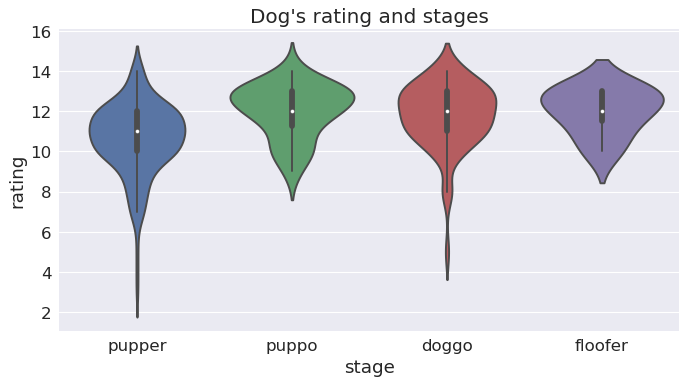

In [64]:
%matplotlib inline
fig=plt.figure(figsize=(10, 5), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.violinplot(x='stage',y="rating",data=stage_df)
ax.set_title("Dog's rating and stages")

Bases on the violin plot, let's ignore *floofer* at the moment because they can be at any age. We know that, by the age, *pupper < puppo < doggo*. So 
- *puppo*, the youngest, has the lowest rating. 
- *doggo*, the elder, has highest rating but not balance. Some *doggo* have low rating.
- *puppo*, the teenager, has the highest and balanced rating.

Finally, we can decide that *puppo*, the teenager, is the stage that is most preferred by the owner.

### Research question 2. Which predicted dog'breed have highest rating?

In this analysis, we only use the first prediction `p1`. So let's drop `p2` and `p3`. We also drop records whose the first prediction is not dog's breed. Due to the small number of dogs in same breeds then we only use breeds that have value counts greater than or equal to 30.

In [65]:
breed_df = df[['p1','p1_conf','p1_dog','rating']].copy()
breed_df = breed_df[breed_df.p1_dog==True]
breed_df.drop('p1_dog',axis=1,inplace=True)

In [66]:
breed_df = breed_df.groupby('p1').filter(lambda x: len(x)>=30)

#### Let's first observe the mean rating

In [67]:
breed_df.groupby('p1').mean().sort_values(by='rating')

,p1_conf,rating
p1,,
pug,0.759223,10.240741
chihuahua,0.587447,10.615385
pomeranian,0.751073,10.864865
toy_poodle,0.616089,11.027778
labrador_retriever,0.649661,11.054348
pembroke,0.721198,11.448276
golden_retriever,0.727063,11.602941
chow,0.615648,11.609756
samoyed,0.740719,11.743590


So basically, *samoyed*, *chow* and *golden_retriever* are the top three. Let's create a violin plot to see if there's something new.

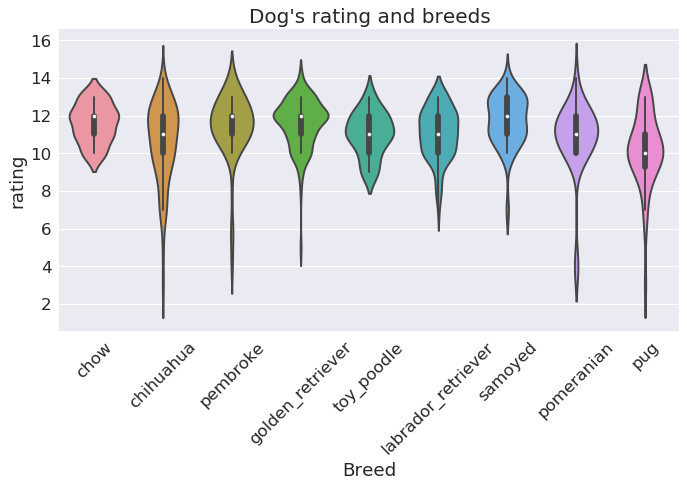

In [68]:
fig=plt.figure(figsize=(10, 5), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.violinplot(x='p1',y="rating",data=breed_df)
ax.set_title("Dog's rating and breeds")
ax.set_xlabel("Breed")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So based on the plot we see that, even though *samoyed*, *chow* and *golden_retriever* are the top three.But *samoyed* and *golden_retriever*'s rating are not balanced. So in this question, we choose *chow*, the most preferable dog breed because of its high mean rating and also balance rating.

### Research question 3. Which is the most common name?

In [69]:
df.name.value_counts()[:5]

Oliver     10
Cooper     10
Charlie    10
Lucy       9 
Tucker     9 
Name: name, dtype: int64

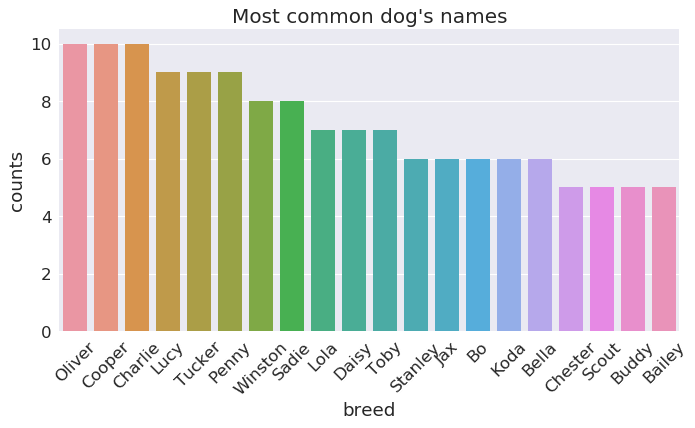

In [70]:
name_df = df.name.value_counts()[:20].rename_axis('breed').reset_index(name='counts')
fig=plt.figure(figsize=(10, 5), dpi= 80)
ax = sns.barplot(x='breed',y='counts',data=name_df)
ax.set_title("Most common dog's names")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So Cooper, Oliver and Charlie are the most common dog's names.

### Reseach question 4. Which breed has features that can be predicted with highest confidence?

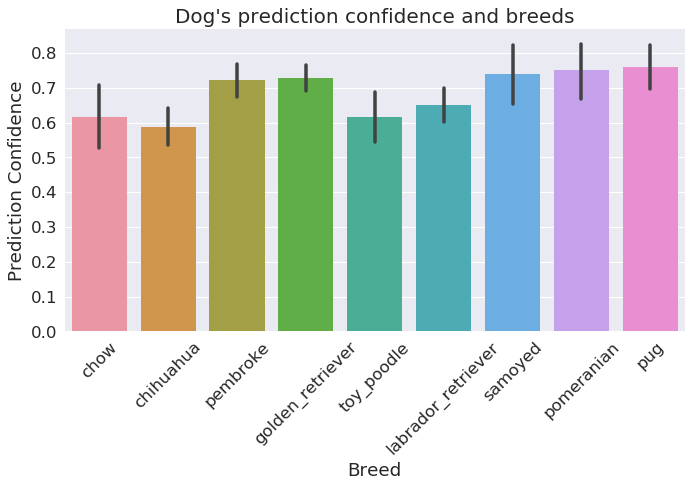

In [71]:
fig=plt.figure(figsize=(10, 5), dpi= 80)
sns.set(font_scale=1.5)
ax = sns.barplot(x='p1',y="p1_conf",data=breed_df)
ax.set_title("Dog's prediction confidence and breeds")
ax.set_xlabel("Breed")
ax.set_ylabel("Prediction Confidence")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

So basically, the breeds pug, pomeranian are top two that have highest confidences in prediction. Let's look at the mean

In [72]:
breed_df.groupby('p1')['p1_conf'].mean().sort_values(ascending=False)

p1
pug                   0.759223
pomeranian            0.751073
samoyed               0.740719
golden_retriever      0.727063
pembroke              0.721198
labrador_retriever    0.649661
toy_poodle            0.616089
chow                  0.615648
chihuahua             0.587447
Name: p1_conf, dtype: float64

So Top 1 is *pug* with the mean 0.759 and the second is *pomeranian* with the mean is 0.751. But does it really *pug* have higher prediction confidence than *pomeranian*? We will do statistical hypothesis testing with 95% confidence as follows:
Let's call $\mu_1$ and $\mu_2$ are repectively the mean of prediction confidence of *pub* and *pomeranian*. Set the following hypotheses:

<center> $H_0: \mu_1 = \mu_2$</center>

<center> $H_1: \mu_1 > \mu_2$</center>

In [73]:
groups = breed_df.groupby('p1')['p1_conf']
pug = groups.get_group('pug')
pomeranian = groups.get_group('pomeranian')
samoyed = groups.get_group('samoyed')

Let's do a t-test for testing above hypotheses

In [74]:
from scipy import stats
stats.ttest_ind(pug,pomeranian, equal_var = False)

Ttest_indResult(statistic=0.15147781259900747, pvalue=0.8799931376168381)

Since `p-value = 0.88` which is really big so there is no significance evidence to say that *pug* has higher prediction confidence than *pomeranian*. So they are both taking the first rank.

## Conclusion

Based on the analysis, we conclude:

-  *puppo*, the teenager, is the stage that is most preferred by the owner.
- *chow*, the most preferable dog breed
- Cooper, Oliver and Charlie are the most common dog's names.
- *pub* and *pomeranian* are both taking the first rank with highest prediction confidence.